Мурадханова Полина БЭК219, семинарская группа №11. Умерла, пока делала дз.


In [77]:
import numpy as np                
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

plt.style.use('fivethirtyeight')    
%matplotlib inline

**ЗАДАЧА 3**

In [78]:
rus, math = stats.norm(60,10), stats.norm(60,10)
rusrvs, mathrvs = rus.rvs(10**4, random_state=1), math.rvs(10**4, random_state=10) 
n = np.random.choice(np.arange(80,161,5), size = 10**4, replace=True)
s = rusrvs+mathrvs


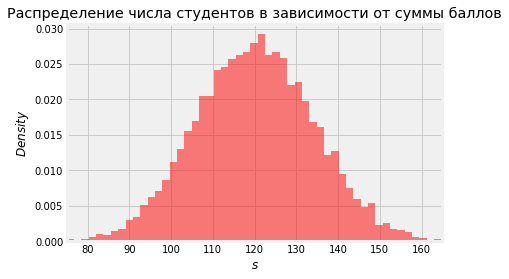

In [79]:
plt.hist(s,density=True,  bins='auto', histtype='barstacked', color = 'red', alpha=0.5)
plt.ylabel('$Density$', fontsize=12)
plt.xlabel('$s$', fontsize=12)
plt.xlim(75, 165)
plt.title("Распределение числа студентов в зависимости от суммы баллов");

На графике видно, что наибольшая плотность (то есть наибольшее количество школьников) находится на уровне суммы баллов, равной 120-122. График куполообразный, потому что распределение "s" является нормальным, как сумма нормальных распределений результатов по русскому и математике.

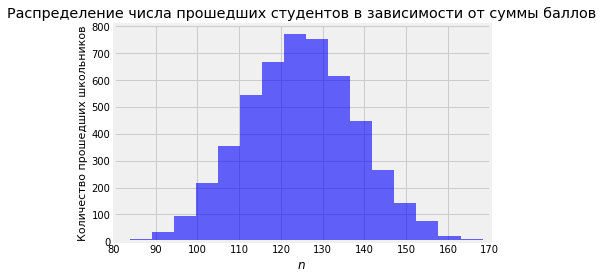

In [80]:
plt.hist(s[s>n], bins=17, histtype='stepfilled', color = 'blue',alpha=0.6)
plt.ylabel('Количество прошедших школьников', fontsize=11)
plt.title("Распределение числа прошедших студентов в зависимости от суммы баллов")
plt.xlim(80, 170)
plt.xlabel('$n$', fontsize=12);

На этом графике видно, что наибольшее количество студентов будет зачислено в вуз, если уровень максимальное значение n будет на уровне 120. Так же на графике стоит заметить, что независимо от значения n (которое по условию принимает значения от 80 до 160), всегда будут поступившие абитуриенты, у которых в сумме больше 160 баллов.

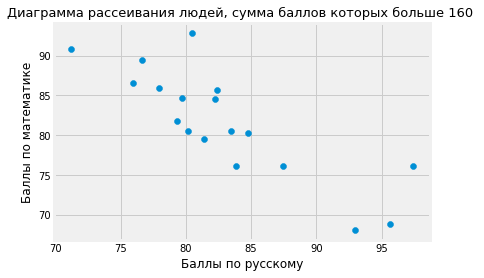

In [81]:
plt.scatter(rusrvs[s>160], mathrvs[s>160])
plt.ylabel('Баллы по математике', fontsize=12)
plt.xlabel('Баллы по русскому', fontsize=12)
plt.title("Диаграмма рассеивания людей, сумма баллов которых больше 160 ", fontsize=13);

In [ ]:
# Выше точечная диаграмма баллов по обоим экзаменам 18 людей (конкретно для моей выборки), которые пройдут в УШЭ независимо от выбранного n.

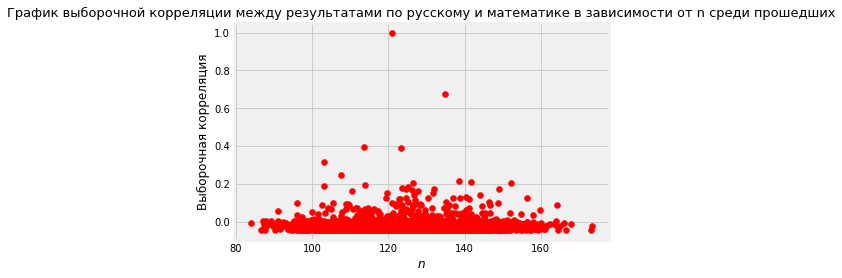

In [82]:
crmatrix = np.zeros((len(s[s>n])))
for i in range(1, len(s[s>n]+2)):
  cr=np.corrcoef(mathrvs[s>n][:(i+1)],rusrvs[s>n][:(i+1)])
  crmatrix[i]=cr[0][1]
  i+=1
plt.ylabel('Выборочная корреляция', fontsize=12)
plt.xlabel('$n$', fontsize=12)
plt.title("График выборочной корреляции между результатами по русскому и математике в зависимости от n среди прошедших", fontsize=13)

plt.scatter(s[s>n], crmatrix, color='red'); #график для тех, кто прошел (надо бы убрать первый ноль в crmatrix - он чисто технический(для одной случайной величины нельзя найти корреляцию), но тогда размерность у того, что в скобках не будет совпадать)

Наибольшая плотность заметна в отрезке [-0.1, 0,1], что говорит о том, что корреляция практически отсутствует. Даже у тех абитуриентов, сумма баллов которых больше 160, наблюдается примерно такая корреляция. Есть выбросы, самий яркий выброс наблюдается в окрестности n=120. Предположу, что это связано с тем что у наибольшего количества абитуриентов сумма баллов примерно равна 120 (тк у изначальных распределений результатов математическое ожидание, то есть мода и медиана = 60).

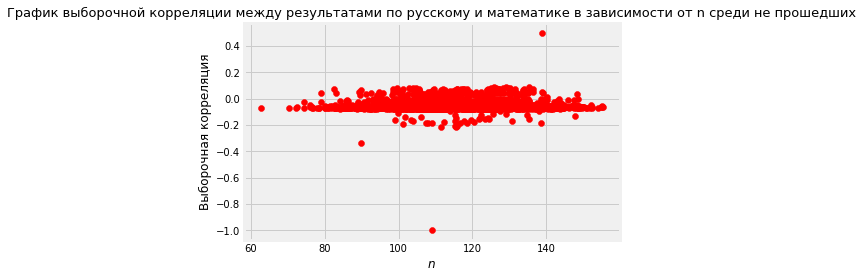

In [83]:
crmatrixnp = np.zeros((len(s[s<=n])))
for i in range(1, len(s[s<=n]+2)):
  cr=np.corrcoef(mathrvs[s<=n][:(i+1)],rusrvs[s<=n][:(i+1)])
  crmatrixnp[i]=cr[0][1]
  i+=1
plt.ylabel('Выборочная корреляция', fontsize=12)
plt.xlabel('$n$', fontsize=12)
plt.title("График выборочной корреляции между результатами по русскому и математике в зависимости от n среди не прошедших", fontsize=13)
plt.scatter(s[s<=n], crmatrixnp, color='red'); 

Наибольшая плотность находится в отрезке [-0.1, 0]. Выбросов также немного, причем все в положительной области, кроме самого яркого, когда n = 110. 

In [84]:
np.corrcoef(rusrvs, mathrvs) #для моей выборки общая корреляция результатов равна этому значению

array([[1.        , 0.00294951],
       [0.00294951, 1.        ]])

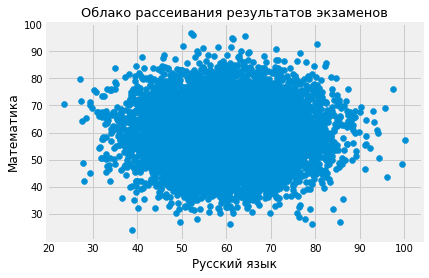

In [85]:
plt.title("Облако рассеивания результатов экзаменов", fontsize=13)
plt.scatter(rusrvs,mathrvs)
plt.ylabel('Математика', fontsize=12)
plt.xlabel('Русский язык', fontsize=12);

Облако рассеивания результатов по всем экзаменам.

**ЗАДАЧА 1**

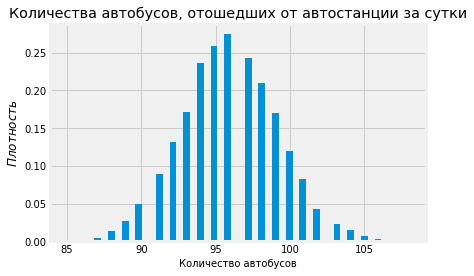

In [86]:
np.random.seed(9909)
def amount():
  k, cumsum = 0, 0 #автобус, пришедший в 8:00, можно не учитывать в выборке
  while cumsum <= 720:
    interval = np.random.choice([5,10])
    cumsum += interval
    k+=1
  if cumsum > 720: #автобусы, пришедшие после 20:00 не учитываются
    k-=1
  return k
alldays = np.zeros(10000)
for i in range(10**4):
   alldays[i] = amount()

plt.hist(alldays, density=True, bins=50, histtype='barstacked', alpha=0.99)
plt.ylabel('$Плотность$', fontsize=12)
plt.xlabel('Количество автобусов', fontsize=10)
plt.title("Количества автобусов, отошедших от автостанции за сутки");


Есть пропуски: количество автобусов не равняется 91 и 98. Мода = 96. Визуально график очень напоминает нормальное распределение с математическим ожиданием примерно равным 96. В результате 10000 симуляций можно сделать вывод, что количество автобусов находится в отрезке [87, 106].

7.512
0.13312034078807242
6.249855999999999


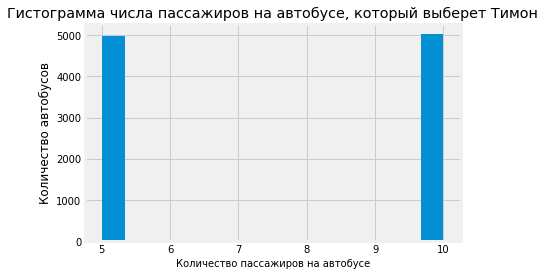

In [87]:
np.random.seed(9909)
timon = np.random.choice([5,10], size = (10**4))
exti = timon.mean()
lambdat=1/exti
print(exti)
print(lambdat)
var = timon.var()
print(var)
plt.hist(timon, bins='auto', histtype='bar', alpha=0.99)
plt.ylabel('Количество автобусов', fontsize=12)
plt.xlabel('Количество пассажиров на автобусе', fontsize=10)
plt.title("Гистограмма числа пассажиров на автобусе, который выберет Тимон");

Несмотря на то что выпадение и 5, и 10 равновероятно. 10-минутных интервал немного больше 5-минутных, то есть парадокс срабатывает: большему количеству людей будет казаться, что они ждут долго транспорт. По сути условия пункта Тимон просто выбирает 10000 раз 5 или 10-минутные интервалы.

In [88]:
np.random.seed(9909)
minutes = 0
fullraspr = np.full((10000,144),0)
for i in range(10000):
    n = 0
    while minutes <=720:
      interval = np.random.choice([5,10])
      minutes+=interval
      fullraspr[i][n] = interval
      n+=1
    i+=1
    minutes=0
pumba = fullraspr
expu = pumba.mean()
lambdap =1/expu
print(expu)
print(lambdap)
var = pumba.var()
print(var)
# нашла матожидание и дисперсию, а также лямбду для экспоненциальной функции распределения
#дисперсия огромная, так как я не разобралась, что делать с нулями в fullraspr 
#(как их удалить так, чтобы все распределения по симуляциям хранились в одной переменной (моя проблема в том, что я не смогла придумать, что делать с количеством столбцов (то есть с количеством пришедших автобусов), которое в каждой симуляции может быть разным)) - нули портят значения показателей

5.04625
0.1981669556601437
16.573972048611115


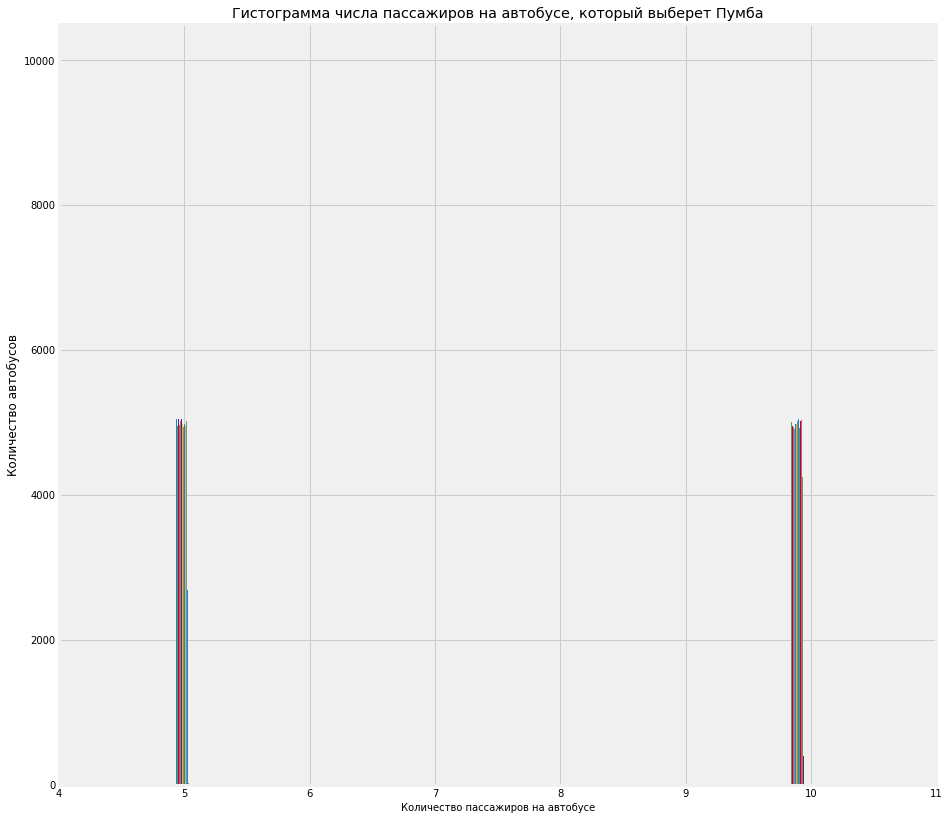

In [89]:
plt.figure(figsize=(14,14))
plt.hist(pumba, bins='auto', histtype='bar', alpha=0.99)
plt.ylabel('Количество автобусов', fontsize=12)
plt.xlabel('Количество пассажиров на автобусе', fontsize=10)
plt.xlim(4,11)
plt.title("Гистограмма числа пассажиров на автобусе, который выберет Пумба");

Теперь Пумба не просто выбирает 10000 раз 5 или 10-минутные интервалы: для него важно то, как распределяются интервалы во время каждого дня (то есть симуляции).

7.4937480557547245
54.971614767851705


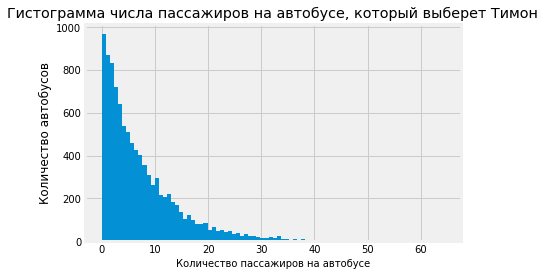

In [90]:
#ПУНКТ Г
np.random.seed(9909)
timonexp = np.random.exponential(scale=exti, size=10000)
exti = timonexp.mean()
print(exti)
varti = timonexp.var()
print(varti)
plt.hist(timonexp, bins='auto', histtype='bar', alpha=0.99)
plt.ylabel('Количество автобусов', fontsize=12)
plt.xlabel('Количество пассажиров на автобусе', fontsize=10)
plt.title("Гистограмма числа пассажиров на автобусе, который выберет Тимон");

In [91]:
#не придумала, как и куда записывать распределения по каждому дню, так как нет максимального количества автобусов, которое можно было посчитать, как раньше:(
np.random.seed(9909)
minutes = 0
fullraspr = np.full((10000,10000),0)
for i in range(10001):
    minutes=0
    while minutes <=720:
      interval = np.random.exponential(scale=expu)
      minutes+=interval
      fullraspr[i][n] = interval
      n+=1
    i+=1
    
pumba = fullraspr
expu = pumba.mean()
print(expu)
var = pumba.var()
print(var)

IndexError: ignored

**ЗАДАЧА 2**








In [216]:
# так как изначально под "изменениями траекториями богатства" я поняла то, что надо показать, сколько денег остается у персонажа в конце каждой симуляции, то и задачу для каждого перса я решала с этой целью, поэтому было написано три функции и построено три графика:)
# решила их не убирать

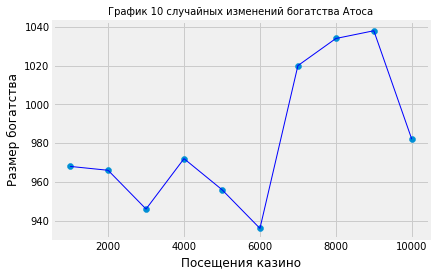

In [92]:
#атос
from scipy.stats import bernoulli
np.random.seed(979)
def onesimatos():
  x = 1000
  oneday =  bernoulli.rvs(size=10**3, p=0.49)
  for i in range(1000):
    if oneday[i]==1:
      x+=1
    else:
      x-=1
  return x
atos = np.zeros(10000)
for i in range(len(atos)):
  atos[i]=onesimatos() 


x = np.arange(1000,10**7+1, 1000)
plt.plot(x[:10], atos[:10],color = 'blue', linewidth = 1)
plt.ylabel('Размер богатства', fontsize=12)
plt.xlabel('Посещения казино', fontsize=12)
plt.title("График 10 случайных изменений богатства Атоса", fontsize=10)
plt.scatter(x[:10], atos[:10]);

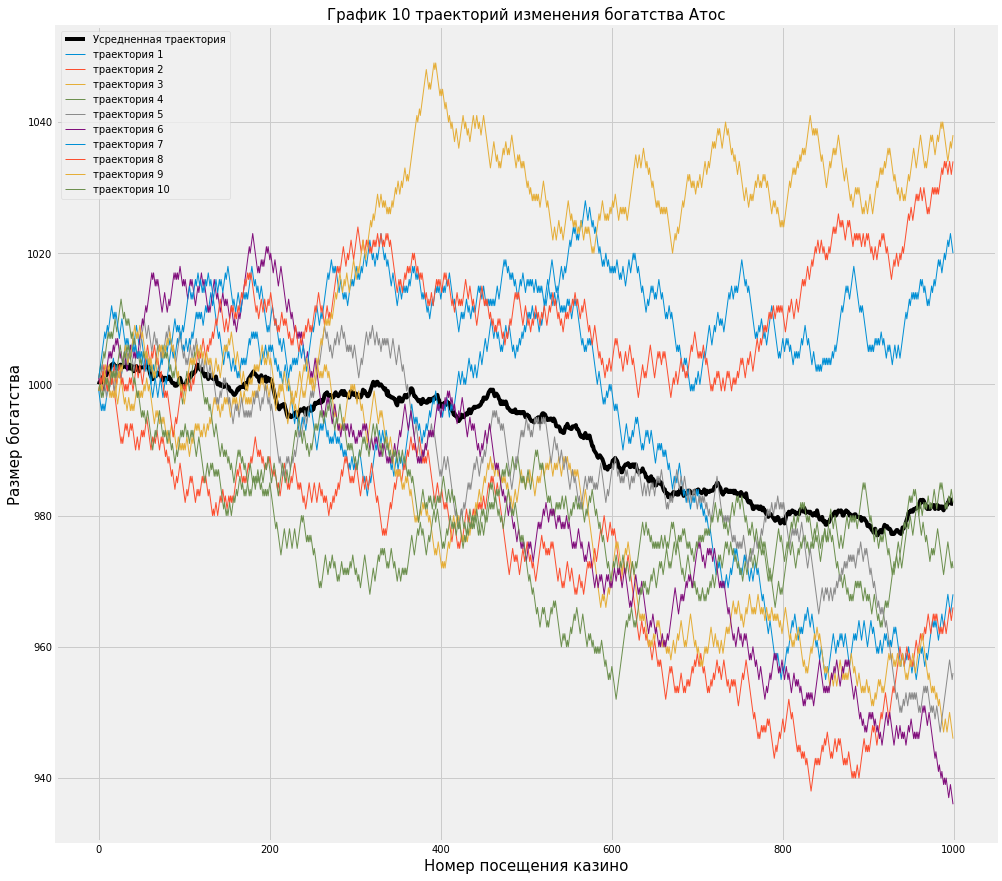

In [94]:
#атос
from scipy.stats import bernoulli
np.random.seed(979)
atos = np.full((10000,1000), 0)
for stroka in range(10000):
  x=1000
  oneday =  bernoulli.rvs(size=1000,p=0.49)
  for k in range(1000):
      if oneday[k]==1:
        x+=1
        atos[stroka][k]=x
      else:
        x-=1
        atos[stroka][k]=x
atos10=atos[:10]           


plt.figure(figsize=(15, 15))
plt.ylabel('Размер богатства', fontsize=15)
plt.xlabel('Номер посещения казино', fontsize=15)
plt.title("График 10 траекторий изменения богатства Атос", fontsize=15)
means =np.mean(atos10, axis=0) #усредненная траектория
absc=np.arange(1000)
plt.plot( absc,means, color='black',label='Усредненная траектория')
for i in range(10):
  plt.plot(atos[i], linewidth = 1, label=f'траектория {i+1}')
  plt.legend();     

Больше половины траекторий посещений казино идут находятся в упадке в конце симуляции. Усредненная траектория также идет вниз, в среднем в конце симуляции персонаж оказывается с меньшим количеством денег, чем в начале симуляции.Cредний размер богатства на конец симуляии >980.

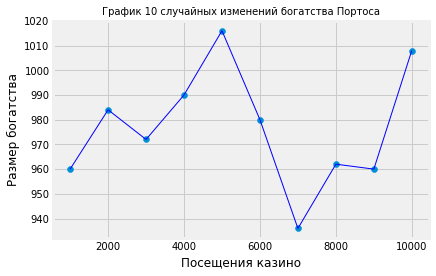

In [95]:
#портос
from scipy.stats import bernoulli
np.random.seed(979)
def  onesimportos(): 
  x = 1000
  kr3 =  bernoulli.rvs(size=10**3, p=0.09)
  nekr3 =  bernoulli.rvs(size=10**3, p=0.74)
  for i in range(1000):
    if (x%3==0 and kr3[i]==1):
      x+=1
      
    elif (x%3!=0 and nekr3[i]==1):
      x+=1
      
    else:
      x-=1
  return x
portos = np.zeros(10000)
for i in range(len(portos)):
  portos[i]=onesimportos()

x = np.arange(1000,10**7+1, 1000)
plt.plot(x[:10], portos[:10],color = 'blue', linewidth = 1)
plt.ylabel('Размер богатства', fontsize=12)
plt.xlabel('Посещения казино', fontsize=12)
plt.title("График 10 случайных изменений богатства Портоса", fontsize=10)
plt.scatter(x[:10], portos[:10]);

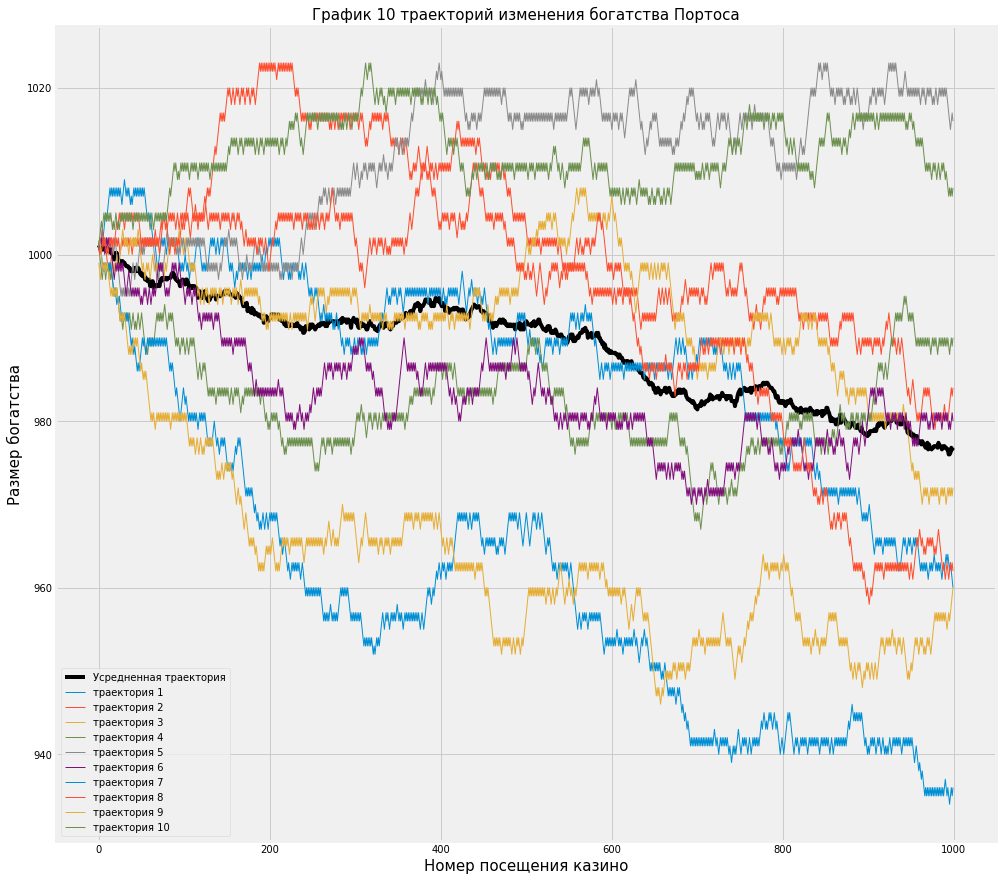

In [96]:
#портос
from scipy.stats import bernoulli
np.random.seed(979)
portos = np.full((10000,1000), 0)
for stroka in range(10000):
  x=1000
  kr3 =  bernoulli.rvs(size=1000,p=0.09)
  nekr3 =  bernoulli.rvs(size=1000, p=0.74)
  for l in range(1000):
    if (x%3==0 and kr3[l]==1) or (x%3!=0 and nekr3[l]==1):
      x+=1
      portos[stroka][l]=x
    else:
      x-=1
      portos[stroka][l]=x
portos10=portos[:10]

plt.figure(figsize=(15, 15))
plt.ylabel('Размер богатства', fontsize=15)
plt.xlabel('Номер посещения казино', fontsize=15)
plt.title("График 10 траекторий изменения богатства Портоса", fontsize=15)
means =np.mean(portos10, axis=0) #усредненная траектория
absc=np.arange(1000)
plt.plot( absc,means, color='black',label='Усредненная траектория')
for i in range(10):
  plt.plot(portos10[i], linewidth = 1, label=f'траектория {i+1}')
  plt.legend();

Здесь на графике еще меньше траекторий, которые в итоге оставляют персонажа с выигрышем. Усредненная траектория также идет вниз, при этом это казино в среднем забирает у персонажа больше денег, чем прошлое (средний размер богатства на конец симуляии <980).

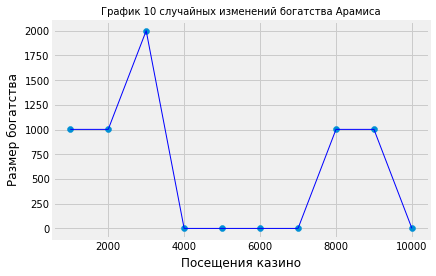

In [97]:
#Арамис
from scipy.stats import bernoulli
np.random.seed(979)
def  onesimaramis():
  x = 1000 
  choice =  bernoulli.rvs(size=10**3, p=0.5)
  for i in range(10000):
      if choice[i]==1:
          oneday =  bernoulli.rvs(p=0.49)
          for k in range(1000):
              if oneday==1:
                  x+=1
              else:
                  x-=1
      else:
          kr3 =  bernoulli.rvs(p=0.09)
          nekr3 =  bernoulli.rvs( p=0.74)
          for l in range(1000):
              if (x%3==0 and kr3==1) or (x%3!=0 and nekr3==1):
                  x+=1
              else:
                  x-=1
      return x
aramis = np.zeros(10000)
for i in range(len(aramis)):
  aramis[i]=onesimaramis() 
  
x = np.arange(1000,10**7+1, 1000)
plt.plot(x[:10], aramis[:10],color = 'blue', linewidth = 1)
plt.ylabel('Размер богатства', fontsize=12)
plt.xlabel('Посещения казино', fontsize=12)
plt.title("График 10 случайных изменений богатства Арамиса", fontsize=10)
plt.scatter(x[:10], aramis[:10]);

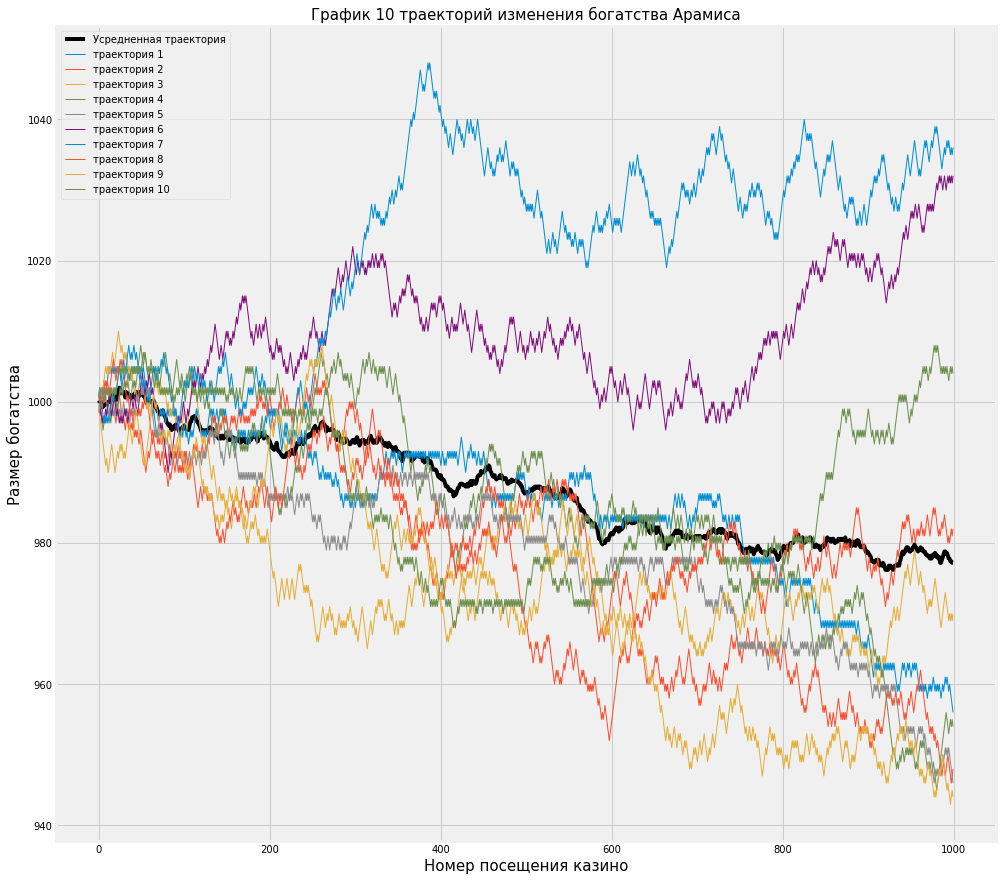

In [98]:
#арамис
from scipy.stats import bernoulli
np.random.seed(979)
aramis = np.full((10000,1000), 0)
for stroka in range(10000):
  x=1000
  choiceofcasino =  bernoulli.rvs(p=0.5)
  if choiceofcasino==1:
          oneday =  bernoulli.rvs(size=1000,p=0.49)
          for k in range(1000):
              if oneday[k]==1:
                  x+=1
                  aramis[stroka][k]=x
              else:
                  x-=1
                  aramis[stroka][k]=x
                  
  else:
          kr3 =  bernoulli.rvs(size=1000,p=0.09)
          nekr3 =  bernoulli.rvs(size=1000, p=0.74)
          for l in range(1000):
              if (x%3==0 and kr3[l]==1) or (x%3!=0 and nekr3[l]==1):
                  x+=1
                  aramis[stroka][l]=x
              else:
                  x-=1
                  aramis[stroka][l]=x
aramis10=aramis[:10] 


plt.figure(figsize=(15, 15))
plt.ylabel('Размер богатства', fontsize=15)
plt.xlabel('Номер посещения казино', fontsize=15)
plt.title("График 10 траекторий изменения богатства Арамиса", fontsize=15)
means =np.mean(aramis10, axis=0) #усредненная траектория
absc=np.arange(1000)
plt.plot( absc,means, color='black',label='Усредненная траектория')
trend=np.full((10,10), 0)
for i in range(10):
    trend[i] = (np.mean(aramis10[i], axis=0))
for i in range(10):
  plt.plot(aramis10[i], linewidth = 1, label=f'траектория {i+1}')
  plt.legend();



 Усредненная траектория сттремится вниз - игрок теряет богатство, несмотря на микс стратегий. Средний выигрыш в конце симуляций также находится в районе 980.

февраль очень депрессивный для меня в целом, как будто бы и ничего супер классного вспомнить не могу,
но у меня кошка умерла, поэтому весь февраль я в трауре((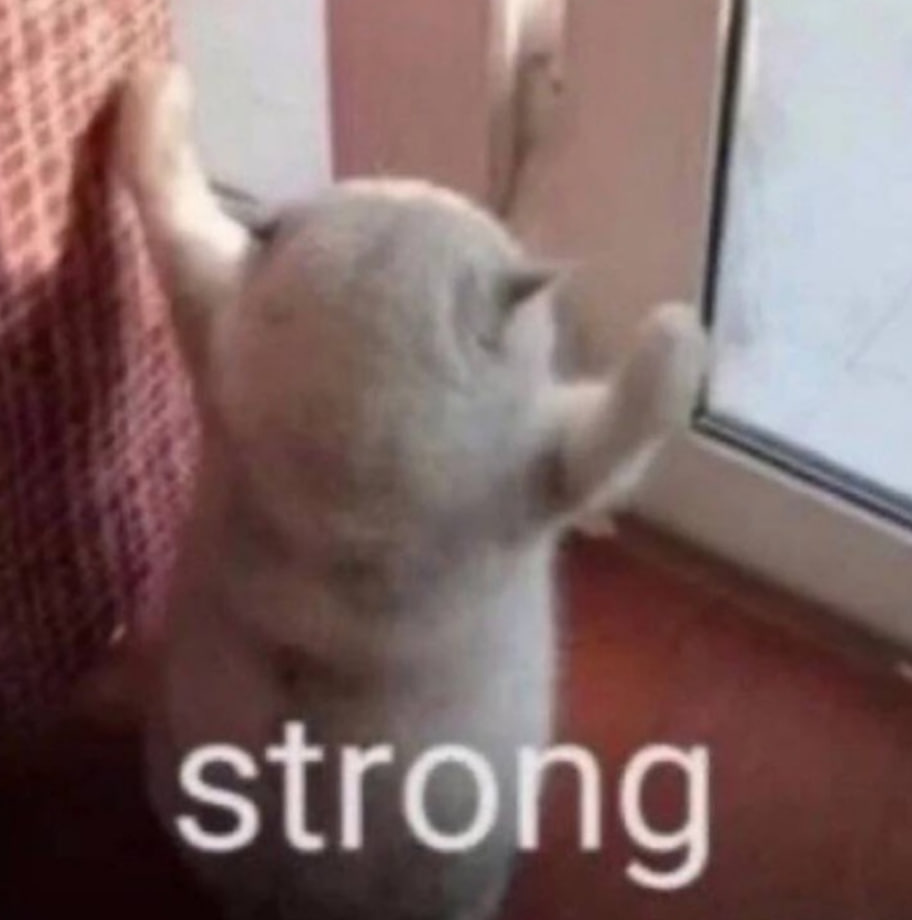